<a href="https://colab.research.google.com/github/M-Raghavi/MachineLearning-codes/blob/main/EXP_4_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayes Theorem
$$
p(A|B) = \frac{p(A \cap B)}{p(B)} \tag{1} \\
$$
$$
p(B|A) = \frac{p(A \cap B)}{p(A)} \tag{2} \\
$$
$$
\frac{(1)}{(2)} \implies \frac{p(A|B)}{p(B|A)} = \frac{p(A)}{p(B)} \\
\implies p(A|B) = p(B|A) . \frac{p(A)}{p(B)}
$$


\begin{array}{|c|p{8cm}|}
\hline
\textbf{Naive Bayes Technique} & \textbf{When to Use?} \\
\hline
\text{Gaussian Naive Bayes}   & \text{When your features are continuous and follow a normal (Gaussian) distribution.} \\
\hline
\text{Multinomial Naive Bayes} & \text{When your features are discrete counts, especially useful in text classification.} \\
\hline
\text{Bernoulli Naive Bayes}  & \text{When your features are binary (0s and 1s), particularly useful for binary features in text data.} \\
\hline
\end{array}


# Gaussian Naive Bayes

## Basic Imports

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering

In [ ]:
# Import iris data
from sklearn.datasets import load_iris


# Load the data
iris=load_iris()

# Get X and y
X=iris['data']
y=iris['target']

# Create dataframe
df=pd.DataFrame(X,columns=iris.feature_names)
df['target']=y

# Get top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## EDA
> We won't be doing the full EDA. Just a bare minimum steps will be done

In [ ]:
# Get the shape of the data
df.shape

(150, 5)

In [ ]:
# Get the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Print number of nulls in each feature
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
# Check if target is balanced
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


## Splitting the data

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# Get the shapes of X, X_train, X_test
print(f"X {X.shape}")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X (150, 4)
X_train: (120, 4)
X_test: (30, 4)


## Scale the data

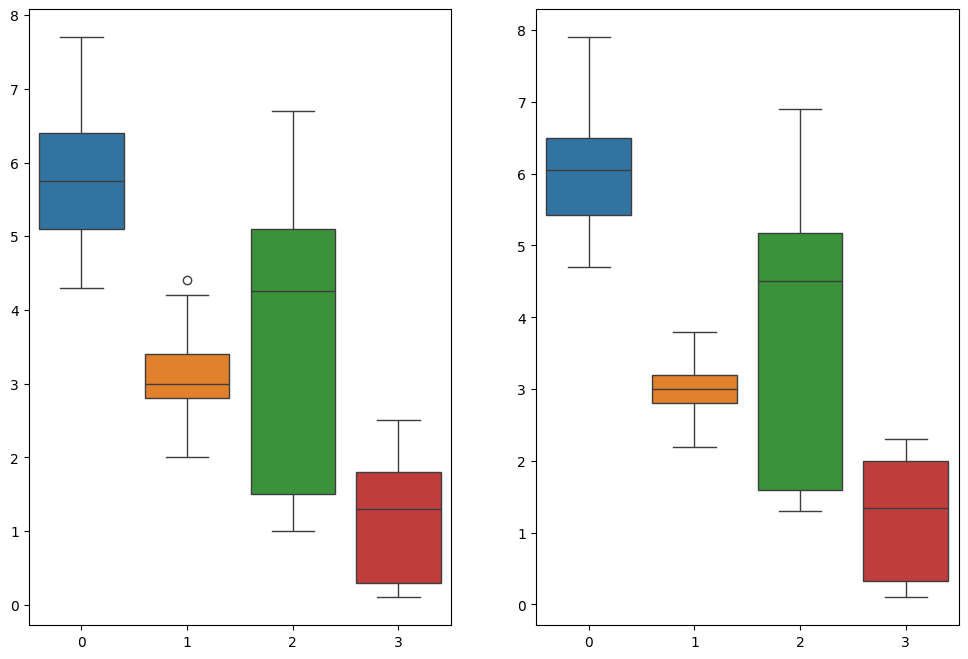

In [ ]:
# Distribution before scaling
fig,ax=plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(X_train,ax=ax[0])
sns.boxplot(X_test,ax=ax[1])
plt.show()

In [ ]:
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler=StandardScaler()

# Transform the data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

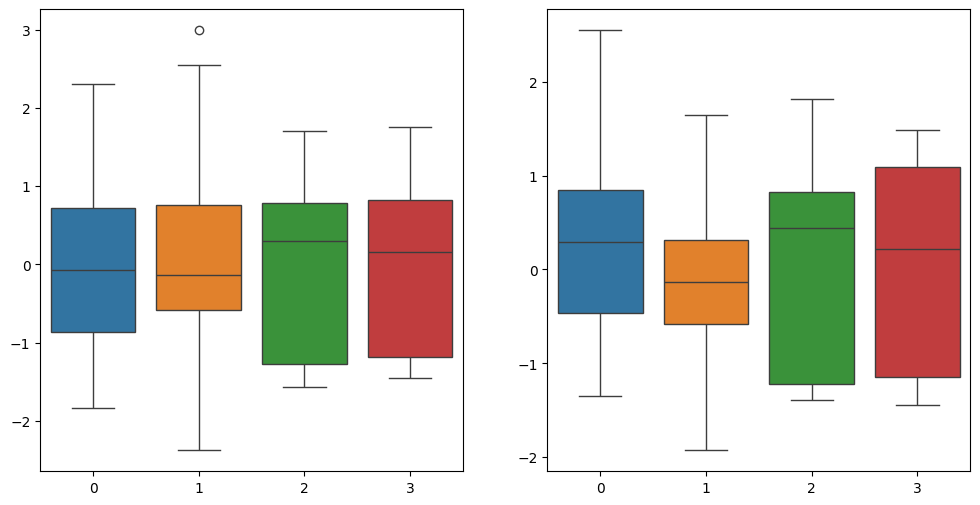

In [ ]:
# Distribution after scaling
fig,ax=plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(X_train_scaled,ax=ax[0])
sns.boxplot(X_test_scaled,ax=ax[1])
plt.show()

## Modeling

In [ ]:
# Import the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
model=GaussianNB()


# Fit the model to the data
model.fit(X_train,y_train)

GaussianNB()

## Prediction

In [ ]:
# Predict on the test data
y_pred=model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## Evaluation

In [ ]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# print the metrics
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Bernoulli Naive Bayes

## Basic Imports

In [ ]:
# Import the necessary packages
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Gathering

In [ ]:
# Import the breast_cancer dataset
from sklearn.datasets import load_breast_cancer

# Load the data
cancer=load_breast_cancer()

# Get X and y
X=cancer['data']
y=cancer['target']
# Create dataframe
df2=pd.DataFrame(X,columns=cancer.feature_names)
df2['target']=y
# Get top 5 rows
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA
> We won't be doing the full EDA. Just a bare minimum steps will be done

In [ ]:
# Get the shape of the data
df2.shape

(569, 31)

In [ ]:
# Get the info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Print number of nulls in each feature
df2.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# Check if target is balanced
df2['target'].value_counts()

,count
target,
1,357
0,212


## Splitting the data

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## Scale the data

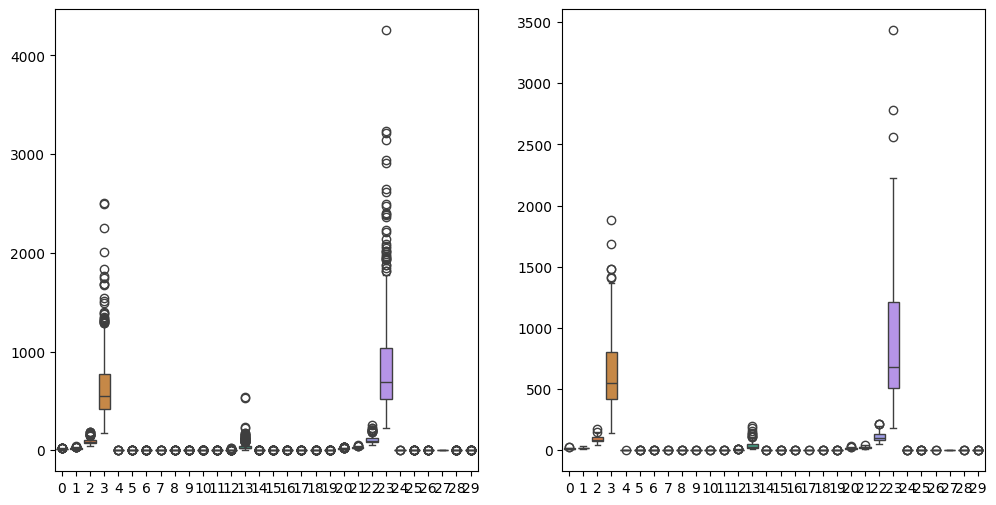

In [ ]:
# Distribution before scaling
fig,ax=plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(X_train,ax=ax[0])
sns.boxplot(X_test,ax=ax[1])
plt.show()

In [ ]:
# Import the scaler
from sklearn.preprocessing import StandardScaler


# Instantiate the scaler
scaler=StandardScaler()


# Transform the data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

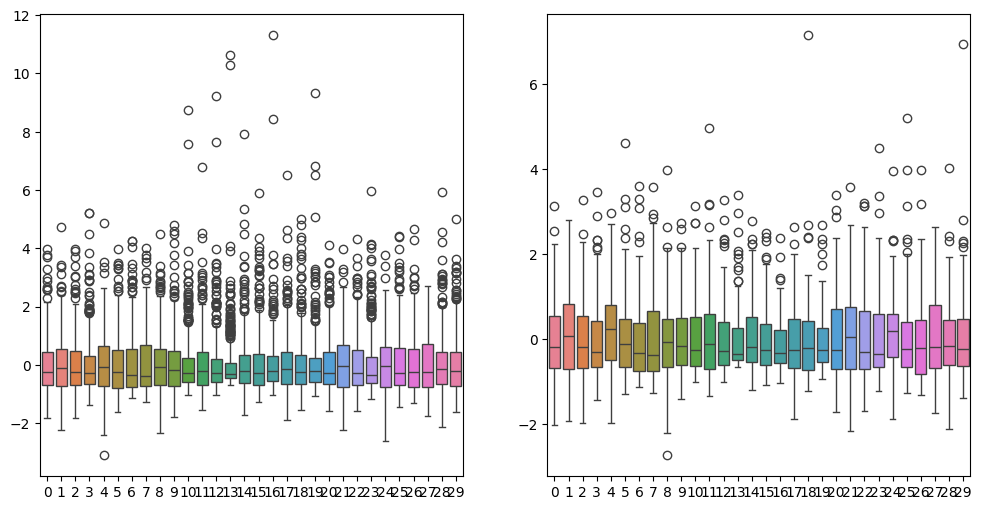

In [ ]:
# Distribution after scaling
fig,ax=plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(X_train_scaled,ax=ax[0])
sns.boxplot(X_test_scaled,ax=ax[1])
plt.show()

## Modeling

In [ ]:
# Import the Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

# Instantiate the model
model2=BernoulliNB()

# Fit the model to the data
model2.fit(X_train,y_train)

BernoulliNB()

## Prediction

In [ ]:
# Predict on the test data
y_pred2=model2.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

## Evaluation

In [ ]:
# Import the evaluation metrics
from sklearn.metrics import classification_report

# print the metrics
report2=classification_report(y_test,y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.62      1.00      0.77        71

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
